# Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading the training and  test data

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.shape , test.shape

((7000, 24), (3000, 23))

# Appending train and test dataset 

In [4]:
data=train.append(test)

In [5]:
data.shape

(10000, 24)

In [6]:
data.tail()

,Age,Attrition_rate,Compensation_and_Benefits,Decision_skill_possess,Education_Level,Employee_ID,Gender,Hometown,Pay_Scale,Post_Level,...,Unit,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Work_Life_balance,growth_rate
2995,32.0,NaN,type2,Directive,3,EID_22547,F,Franklin,6.0,3,...,Sales,1,-0.1048,0.7075,1.0,4,7,4,2.0,38
2996,NaN,NaN,type2,Conceptual,2,EID_10066,F,Franklin,9.0,4,...,Marketing,3,0.7516,0.7075,3.0,4,8,3,1.0,57
2997,60.0,NaN,type3,Analytical,4,EID_7126,F,Lebanon,9.0,2,...,Logistics,3,-1.8176,-0.4537,NaN,4,8,4,3.0,69
2998,51.0,NaN,type3,Behavioral,1,EID_4929,F,Springfield,6.0,2,...,IT,5,0.7516,-0.4537,2.0,3,9,2,1.0,30
2999,45.0,NaN,type4,Directive,1,EID_24750,F,Franklin,8.0,2,...,Sales,3,0.7516,-0.4537,2.0,2,8,5,4.0,70


# Splitting for X and Y

In [66]:
X = data.drop(['Attrition_rate','Employee_ID'],axis=1)
Y = data['Attrition_rate']
z=data.iloc[:,:]
type(z)

pandas.core.frame.DataFrame

In [8]:
X.dtypes #checking for the datatype of the features the X dataset

Age                          float64
Compensation_and_Benefits     object
Decision_skill_possess        object
Education_Level                int64
Gender                        object
Hometown                      object
Pay_Scale                    float64
Post_Level                     int64
Relationship_Status           object
Time_of_service              float64
Time_since_promotion           int64
Travel_Rate                    int64
Unit                          object
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Work_Life_balance            float64
growth_rate                    int64
dtype: object

# Data visualization on combined Data

In [9]:
X.shape,X.columns

((10000, 22),
 Index(['Age', 'Compensation_and_Benefits', 'Decision_skill_possess',
        'Education_Level', 'Gender', 'Hometown', 'Pay_Scale', 'Post_Level',
        'Relationship_Status', 'Time_of_service', 'Time_since_promotion',
        'Travel_Rate', 'Unit', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
        'VAR7', 'Work_Life_balance', 'growth_rate'],
       dtype='object'))

In [10]:
X.describe()

,Age,Education_Level,Pay_Scale,Post_Level,Time_of_service,Time_since_promotion,Travel_Rate,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Work_Life_balance,growth_rate
count,9427.000000,10000.000000,9988.000000,10000.000000,9804.000000,10000.00000,10000.000000,10000.000000,9206.000000,10000.000000,9046.000000,10000.000000,10000.000000,10000.000000,9984.000000,10000.000000
mean,39.675507,3.199400,6.022627,2.797000,13.390657,2.37860,0.820700,3.089100,0.002653,-0.005826,1.895976,2.834800,7.110000,3.249600,2.385817,47.008400
std,13.574856,1.065436,2.070087,1.171037,10.311381,1.14978,0.646524,0.831884,0.992949,0.990812,0.533987,0.939466,1.160877,0.918795,1.128782,15.848553
min,19.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,1.000000,20.000000
25%,27.000000,3.000000,5.000000,2.000000,5.000000,1.00000,0.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,1.000000,33.000000
50%,38.000000,3.000000,6.000000,3.000000,10.000000,2.00000,1.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,2.000000,47.000000
75%,52.000000,4.000000,8.000000,4.000000,21.000000,3.00000,1.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,3.000000,61.000000
max,65.000000,5.000000,10.000000,5.000000,43.000000,4.00000,2.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,5.000000,74.000000


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 22 columns):
Age                          9427 non-null float64
Compensation_and_Benefits    10000 non-null object
Decision_skill_possess       10000 non-null object
Education_Level              10000 non-null int64
Gender                       10000 non-null object
Hometown                     10000 non-null object
Pay_Scale                    9988 non-null float64
Post_Level                   10000 non-null int64
Relationship_Status          10000 non-null object
Time_of_service              9804 non-null float64
Time_since_promotion         10000 non-null int64
Travel_Rate                  10000 non-null int64
Unit                         10000 non-null object
VAR1                         10000 non-null int64
VAR2                         9206 non-null float64
VAR3                         10000 non-null float64
VAR4                         9046 non-null float64
VAR5                         

In [12]:
X.isnull().sum()

Age                          573
Compensation_and_Benefits      0
Decision_skill_possess         0
Education_Level                0
Gender                         0
Hometown                       0
Pay_Scale                     12
Post_Level                     0
Relationship_Status            0
Time_of_service              196
Time_since_promotion           0
Travel_Rate                    0
Unit                           0
VAR1                           0
VAR2                         794
VAR3                           0
VAR4                         954
VAR5                           0
VAR6                           0
VAR7                           0
Work_Life_balance             16
growth_rate                    0
dtype: int64

# Explolatory Data Analysis

Lets start exploring by checking out missing data

We will use countplot method of seaborn library for the better visualization

In [ ]:
#sns.set_style("whitegrid")
#sns.countplot(x='Relationship_Status',hue='Gender',data=data,palette='RdBu_r')

# 1) Age

Using boxplot() function of seaborn

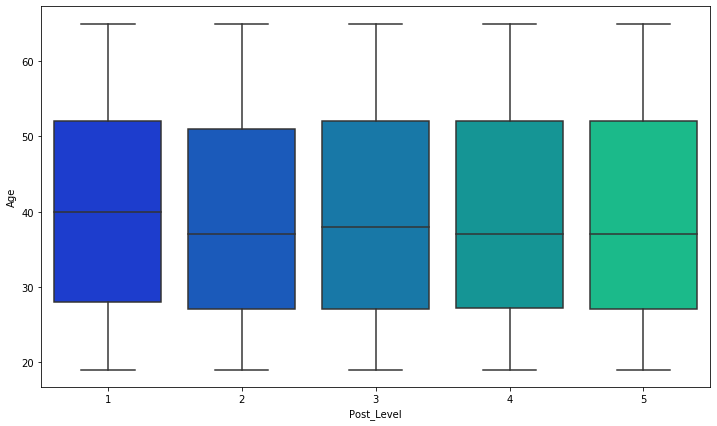

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Post_Level',y='Age',data=X,palette='winter')

Filling the missing values of Age feature on the basis of the Post_Level

In [14]:
def impute_age(cols):
    age=cols[0];post_lvl=cols[1];
    if(pd.isnull(age)):
        if(post_lvl==1):return 41
        elif(post_lvl==2 or post_lvl==5 or post_lvl==5):return 37
        else:return 38.5
    else:return age

using apply() func to fill the missing values

In [15]:
#if used mode() as a filler , the standard Deviation would be more 
(data.Age.fillna(data.Age.mode())).std() 

13.574856214527793

In [16]:
#if used mean() as a filler , the standard Deviation would be more (Best)
(data.Age.fillna(data.Age.mean())).std() 

13.180159676822795

In [17]:
#if used median() as a filler , the standard Deviation would be more 
(data.Age.fillna(data.Age.median())).std() 

13.185911670288773

Among the mean() , mode() ,median() and our method impute_Age() , the best is the mean() as it has the least Standard deviation among the 4, so we will restart kernel and use mean to fill the missing values

In [18]:
#X['Age']=X[['Age','Post_Level']].apply(impute_age,axis=1) (Not this)
X['Age'].fillna(X['Age'].mean(),inplace=True)

In [19]:
X["Age"].isnull().sum()

0

# 2) Pay_Scale

In [20]:
X.Pay_Scale.describe()

count    9988.000000
mean        6.022627
std         2.070087
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Pay_Scale, dtype: float64

In [21]:
X.Pay_Scale.value_counts()

8.0     1964
6.0     1820
5.0     1640
4.0     1405
7.0     1163
9.0      703
2.0      383
3.0      366
10.0     314
1.0      230
Name: Pay_Scale, dtype: int64

In [22]:
print(data.Pay_Scale.median())
(data.Pay_Scale.fillna(data.Pay_Scale.median())).std() 

6.0


2.068844424243924

Medain has the least standard deviation , fill by median() in X

In [23]:
X['Pay_Scale'].fillna(X.Pay_Scale.median(),inplace=True)
X.Pay_Scale.std()

2.068844424243924

In [24]:
X.isnull().sum()

Age                            0
Compensation_and_Benefits      0
Decision_skill_possess         0
Education_Level                0
Gender                         0
Hometown                       0
Pay_Scale                      0
Post_Level                     0
Relationship_Status            0
Time_of_service              196
Time_since_promotion           0
Travel_Rate                    0
Unit                           0
VAR1                           0
VAR2                         794
VAR3                           0
VAR4                         954
VAR5                           0
VAR6                           0
VAR7                           0
Work_Life_balance             16
growth_rate                    0
dtype: int64

# 3) Time_of_service

In [25]:
X.Time_of_service.describe()

count    9804.000000
mean       13.390657
std        10.311381
min         0.000000
25%         5.000000
50%        10.000000
75%        21.000000
max        43.000000
Name: Time_of_service, dtype: float64

In [26]:
print(data.Time_of_service.mode())
print((data.Time_of_service.fillna(data.Time_of_service.mean())).std() )
print((data.Time_of_service.fillna(data.Time_of_service.median())).std() )
print((data.Time_of_service.fillna(data.Time_of_service.mode())).std()) 

0    6.0
dtype: float64
10.209818923821244
10.220633076969813
10.311380726902032


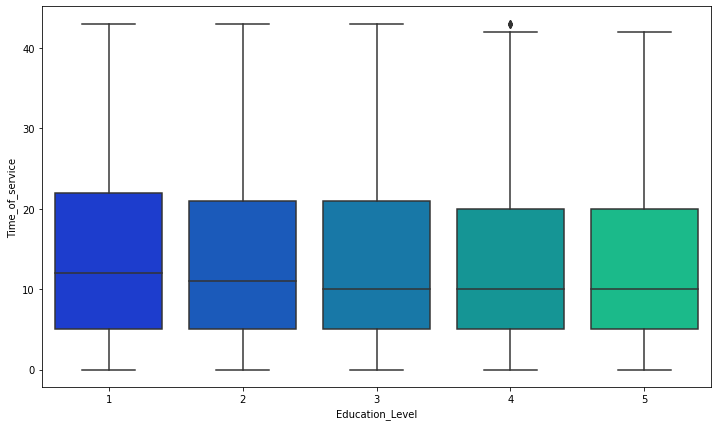

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Education_Level',y='Time_of_service',data=X,palette='winter')

In [28]:
def impute_tos(cols):
    a=cols[0];b=cols[1];
    if(pd.isnull(a)):
        if(b=='type1'):return 7
        elif(b=='type4' or b=='type3' or b=='type2'):return 10
        else:return 12
    else:return a

In [29]:
#(data[['Time_of_service','Time_since_promotion']].apply(impute_tos,axis=1)).std()

In [29]:
X['Time_of_service'].fillna(X.Time_of_service.mean(),inplace=True)
X.Time_of_service.std(),X.Time_of_service.isnull().sum()

(10.209818923821244, 0)

# 4) VAR2

In [30]:
data.VAR2.value_counts()

 0.7516    3582
-0.1048    2288
-0.9612    1469
-1.8176    1173
 1.6081     694
Name: VAR2, dtype: int64

In [31]:
data.VAR2.describe()

count    9206.000000
mean        0.002653
std         0.992949
min        -1.817600
25%        -0.961200
50%        -0.104800
75%         0.751600
max         1.608100
Name: VAR2, dtype: float64

In [32]:
print(data.VAR2.mode())
print((data.VAR2.fillna(data.VAR2.mean())).std() )
print((data.VAR2.fillna(data.VAR2.median())).std() )
print((data.VAR2.fillna(data.VAR2.mode())).std()) 

0    0.7516
dtype: float64
0.9527092296589679
0.9531521033582805
0.99294858296846


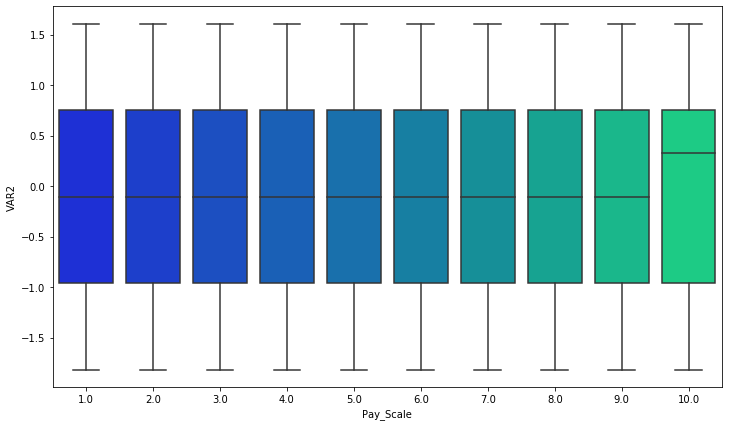

In [33]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pay_Scale',y='VAR2',data=X,palette='winter')

In [34]:
X['VAR2'].fillna(X.VAR2.median(),inplace=True)
X.VAR2.std()

0.9531521033582805

In [35]:
X.isnull().sum()

Age                            0
Compensation_and_Benefits      0
Decision_skill_possess         0
Education_Level                0
Gender                         0
Hometown                       0
Pay_Scale                      0
Post_Level                     0
Relationship_Status            0
Time_of_service                0
Time_since_promotion           0
Travel_Rate                    0
Unit                           0
VAR1                           0
VAR2                           0
VAR3                           0
VAR4                         954
VAR5                           0
VAR6                           0
VAR7                           0
Work_Life_balance             16
growth_rate                    0
dtype: int64

# 5) VAR4

In [36]:
data.VAR4.value_counts()

2.0    6369
1.0    1809
3.0     868
Name: VAR4, dtype: int64

In [37]:
data.VAR4.describe()

count    9046.000000
mean        1.895976
std         0.533987
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: VAR4, dtype: float64

In [38]:
print(data.VAR4.mode())
print((data.VAR4.fillna(data.VAR4.mean())).std() )
print((data.VAR4.fillna(data.VAR4.median())).std() )
print((data.VAR4.fillna(data.VAR4.mode())).std()) 

0    2.0
dtype: float64
0.5078751291399451
0.5087937471193122
0.533987319891187


In [39]:
X['VAR4'].fillna(X.VAR4.mode()[0],inplace=True)
X.VAR4.isnull().sum()

0

In [40]:
X.isnull().sum()

Age                           0
Compensation_and_Benefits     0
Decision_skill_possess        0
Education_Level               0
Gender                        0
Hometown                      0
Pay_Scale                     0
Post_Level                    0
Relationship_Status           0
Time_of_service               0
Time_since_promotion          0
Travel_Rate                   0
Unit                          0
VAR1                          0
VAR2                          0
VAR3                          0
VAR4                          0
VAR5                          0
VAR6                          0
VAR7                          0
Work_Life_balance            16
growth_rate                   0
dtype: int64

# 6) Work_Life_balance

In [41]:
data.Work_Life_balance.value_counts()

1.0    2951
3.0    2858
2.0    2287
4.0    1719
5.0     169
Name: Work_Life_balance, dtype: int64

In [42]:
data.Work_Life_balance.describe()

count    9984.000000
mean        2.385817
std         1.128782
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Work_Life_balance, dtype: float64

In [43]:
print(data.Work_Life_balance.mode()[0])
print((data.Work_Life_balance.fillna(data.Work_Life_balance.mean())).std() )
print((data.Work_Life_balance.fillna(data.Work_Life_balance.median())).std() )
print((data.Work_Life_balance.fillna(data.Work_Life_balance.mode())).std()) 

1.0
1.127878709842213
1.127984128797689
1.128782187475697


In [44]:
X.Work_Life_balance.fillna(X.Work_Life_balance.mean(),inplace=True)

In [45]:
X.isnull().sum()

Age                          0
Compensation_and_Benefits    0
Decision_skill_possess       0
Education_Level              0
Gender                       0
Hometown                     0
Pay_Scale                    0
Post_Level                   0
Relationship_Status          0
Time_of_service              0
Time_since_promotion         0
Travel_Rate                  0
Unit                         0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Work_Life_balance            0
growth_rate                  0
dtype: int64

# One hot encoding to categorical features

In [46]:
def category_onehot_multcols(mc):
    df_final=X;j=0;
    for i in mc:
        print(i)
        df1=pd.get_dummies(X[i],drop_first=True)
        X.drop([i],axis=1,inplace=True)
        if(not j):df_final=df1.copy();
        else:df_final=pd.concat([df_final,df1],axis=1);
        j+=1;
    df_final=pd.concat([X,df_final],axis=1);
    return df_final

In [48]:
cat_features =  list(X.select_dtypes(include=object).columns)

In [49]:
X=category_onehot_multcols(cat_features)

Compensation_and_Benefits
Decision_skill_possess
Gender
Hometown
Relationship_Status
Unit


In [50]:
main_X=X.copy()   #Keep the main set backup

In [51]:
X.shape

(10000, 40)

To remove duplicate data

In [52]:
X=X.loc[:,~X.columns.duplicated()]

In [53]:
X.head()

,Age,Education_Level,Pay_Scale,Post_Level,Time_of_service,Time_since_promotion,Travel_Rate,VAR1,VAR2,VAR3,...,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security
0,42.0,4,7.0,1,4.0,4,1,4,0.7516,1.8688,...,1,0,0,0,0,0,0,0,0,0
1,24.0,3,6.0,3,5.0,4,0,3,-0.9612,-0.4537,...,0,1,0,0,0,0,0,0,0,0
2,58.0,3,8.0,2,27.0,3,0,4,-0.9612,-0.4537,...,0,0,0,0,0,0,1,0,0,0
3,26.0,3,8.0,3,4.0,3,1,3,-1.8176,-0.4537,...,0,0,0,0,0,0,0,0,0,0
4,31.0,1,2.0,3,5.0,4,1,1,0.7516,-0.4537,...,0,1,0,0,0,0,0,0,0,0


# Feature Scaling of the dataset X

In [54]:
scx=StandardScaler()
X=scx.fit_transform(X)

In [55]:
type(X),type(Y)

(numpy.ndarray, pandas.core.series.Series)

# Splitting of data into test and train

In [56]:
train_x = X[:7000,:]
train_y = Y[:7000]
test_x = X[7000:,:]

In [64]:
type(X),X.shape,type(Y),Y.shape

(numpy.ndarray, (10000, 40), pandas.core.series.Series, (10000,))

In [57]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size = 0.2)

# Feature Selection

In [58]:
from sklearn.feature_selection import SelectKBest,f_regression

Applying SelectKBest for selecting best K features (eg K=15)

In [59]:
best_feat=SelectKBest(score_func=f_regression,k=15)
fit=best_feat.fit(X_train,y_train)

In [60]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(main_X.columns)

In [61]:
#concat the 2 dataframes for better visualization
feat_Scores=pd.concat([dfcolumns,dfscores],axis=1)
feat_Scores.columns=['Specs','Score']

In [63]:
feat_Scores

,Specs,Score
0,Age,2.061816
1,Education_Level,2.305788
2,Pay_Scale,1.668239
3,Post_Level,3.541451
4,Time_of_service,2.361479
5,Time_since_promotion,0.614834
6,Travel_Rate,2.345069
7,VAR1,0.032943
8,VAR2,3.317090
9,VAR3,0.366637
